# Plotting daily COVID cases in Hillsborough, Pasco and Pinellas

Read data from a combined excel file containing daily COVID data for the Hillsborough, Pasco and Pinellas counties. The data includes cases from March 2020 to March 2021.

In [16]:
#Hillsborough county
import pandas as pd

df_h = pd.read_excel('Combined_1.xlsx', sheet_name='Hillsborough')
df_h.columns = ['Date', 'Daily Number', 'Moving Average']

In [17]:
df_h.describe()

,Daily Number,Moving Average
count,370.000000,370.000000
mean,307.018919,304.707378
std,260.093046,243.445400
min,1.000000,1.666667
25%,97.500000,79.500000
50%,240.000000,240.250000
75%,438.750000,456.343750
max,1453.000000,948.125000


In [18]:
df_h.head

<bound method NDFrame.head of               Date  Daily Number  Moving Average
0    March 1, 2020             2        2.000000
1    March 3, 2020             2        2.000000
2    March 4, 2020             1        1.666667
3    March 5, 2020             3        2.000000
4    March 6, 2020             3        2.200000
..             ...           ...             ...
365  March 2, 2021           134      292.750000
366  March 3, 2021           298      264.500000
367  March 4, 2021           271      251.500000
368  March 5, 2021           241      241.500000
369  March 6, 2021           263      243.375000

[370 rows x 3 columns]>

<AxesSubplot:xlabel='Date'>

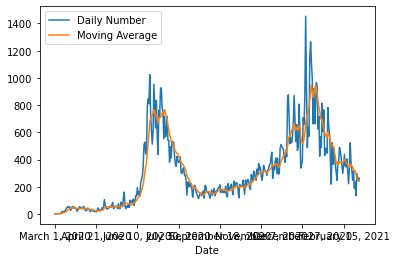

In [29]:
df_h.plot('Date', ['Daily Number', 'Moving Average']) #plot daily cases and moving average for Hillsborough

In [21]:
#Pasco county
import pandas as pd

df_p = pd.read_excel('Combined_1.xlsx', sheet_name='Pasco')
df_p.columns = ['Date', 'Daily Number', 'Moving Average']

In [22]:
df_p.describe()

,Daily Number,Moving Average
count,367.000000,367.000000
mean,92.771117,92.281471
std,83.355562,81.159537
min,1.000000,1.500000
25%,17.500000,11.100000
50%,65.000000,63.100000
75%,153.500000,152.950000
max,372.000000,300.500000


In [23]:
df_p.head

<bound method NDFrame.head of           Date  Daily Number  Moving Average
0   2020-03-01             2             2.0
1   2020-03-02             1             1.5
2   2020-03-07             2             1.7
3   2020-03-08             3             2.0
4   2020-03-09             5             2.6
..         ...           ...             ...
362 2021-03-02            60            88.8
363 2021-03-03            64            81.8
364 2021-03-04            47            72.0
365 2021-03-05            29            65.3
366 2021-03-06            64            61.3

[367 rows x 3 columns]>

<AxesSubplot:xlabel='Date'>

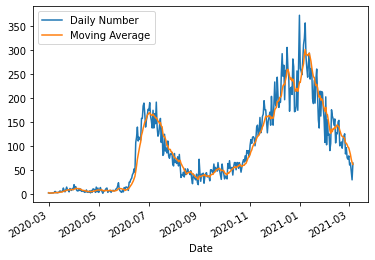

In [24]:
df_p.plot('Date', ['Daily Number', 'Moving Average']) #plot daily cases and moving average for Pasco

In [25]:
#Pinellas county
import pandas as pd

df_pi = pd.read_excel('Combined_1.xlsx', sheet_name='Pinellas')
df_pi.columns = ['Date', 'Daily Number', 'Moving Average']

In [26]:
df_pi.describe()

,Daily Number,Moving Average
count,370.000000,370.000000
mean,183.281081,182.278378
std,155.785315,149.759018
min,2.000000,2.000000
25%,47.000000,39.450000
50%,150.000000,148.000000
75%,286.500000,290.850000
max,745.000000,600.600000


In [27]:
df_pi.head

<bound method NDFrame.head of           Date  Daily Number  Moving Average
0   2020-03-01             2             2.0
1   2020-03-02             4             3.0
2   2020-03-03             4             3.3
3   2020-03-05             5             3.8
4   2020-03-06             4             3.8
..         ...           ...             ...
365 2021-03-02           117           164.3
366 2021-03-03           134           155.6
367 2021-03-04            99           139.5
368 2021-03-05            99           127.3
369 2021-03-06           108           118.0

[370 rows x 3 columns]>

<AxesSubplot:xlabel='Date'>

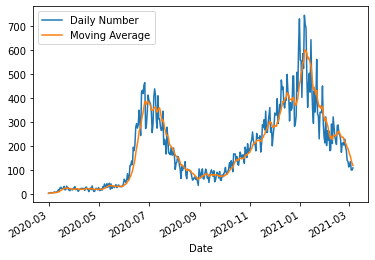

In [31]:
df_pi.plot('Date', ['Daily Number', 'Moving Average'])  #plot daily cases and moving average for Pinellas

# Plotting daily cases in Broward and Palm Beach

Read csv files containing daily cases data for 2020 and 2021. Creating a 2 by 2 visualization showing daily cases and moving average for Palm Beach and Broward counties.

In [32]:
import pandas as pd

df_2020 = pd.read_csv('2020 Cases Only.csv', low_memory=False)
df_2021 = pd.read_csv('2021 Cases Only.csv', low_memory = False)

#creating a combined dataset from the 2020 and 2021 dataframes
df_all = df_2020.append(df_2021)
df_all.head

<bound method NDFrame.head of         OBJECTID      County   Age    Age_group   Gender       Jurisdicti  \
0            NaN        Dade  21.0  15-24 years   Female      FL resident   
1            NaN    Pinellas  18.0  15-24 years   Female      FL resident   
2            NaN    Pinellas  23.0  15-24 years   Female      FL resident   
3            NaN    Pinellas  27.0  25-34 years   Female      FL resident   
4            NaN    Pinellas  29.0  25-34 years   Female      FL resident   
...          ...         ...   ...          ...      ...              ...   
938221       NaN  Palm Beach  65.0  65-74 years  Unknown  Non-FL resident   
938222       NaN      Walton  71.0  65-74 years  Unknown  Non-FL resident   
938223       NaN      Walton  80.0  75-84 years  Unknown  Non-FL resident   
938224       NaN      Walton  85.0    85+ years  Unknown  Non-FL resident   
938225       NaN     Brevard  16.0  15-24 years  Unknown  Non-FL resident   

       Travel_rel       Origin  EDvisit Hospi

In [33]:
import matplotlib 
import matplotlib.pyplot as plt

In [34]:
brw = df_all[df_all['County'].isin(['Broward'])]

brw_count = brw.groupby(['EventDate']).count() #grouping entires by date

#count of cases by date
brw_count.index = pd.to_datetime(brw_count.index, format="%m/%d/%Y")
brw_count_sorted = brw_count.sort_index(axis='index', ascending=True)
brw_count_sorted['Date'] = brw_count_sorted.index.values
brw_count_sorted['Daily Cases'] = brw_count_sorted['County']


brw_sum = brw.groupby(['EventDate']).sum() #grouping entires by date

#sum of cases by date
brw_sum.index = pd.to_datetime(brw_sum.index, format="%m/%d/%Y")
brw_sum_sorted = brw_sum.sort_index(axis='index', ascending=True)
brw_sum_sorted['Date'] = brw_sum_sorted.index.values

broward = brw_count_sorted


broward['Moving Average'] = broward['Daily Cases'].rolling(5, min_periods=0).mean()


In [35]:
pbc = df_all[df_all['County'].isin(["Palm Beach"])]

pbc_count = pbc.groupby(['EventDate']).count() #grouping entires by date

#count of cases by date
pbc_count.index = pd.to_datetime(pbc_count.index, format="%m/%d/%Y")
pbc_count_sorted = pbc_count.sort_index(axis='index', ascending=True)
pbc_count_sorted['Date'] = pbc_count_sorted.index.values
pbc_count_sorted['Daily Cases'] = pbc_count_sorted['County']


pbc_sum = pbc.groupby(['EventDate']).sum() #grouping entires by date

#sum of cases by date
pbc_sum.index = pd.to_datetime(pbc_sum.index, format="%m/%d/%Y")
pbc_sum_sorted = pbc_sum.sort_index(axis='index', ascending=True)
pbc_sum_sorted['Date'] = pbc_sum_sorted.index.values

palmbeach = pbc_count_sorted


palmbeach['Moving Average'] = palmbeach['Daily Cases'].rolling(5, min_periods=0).mean()

[]

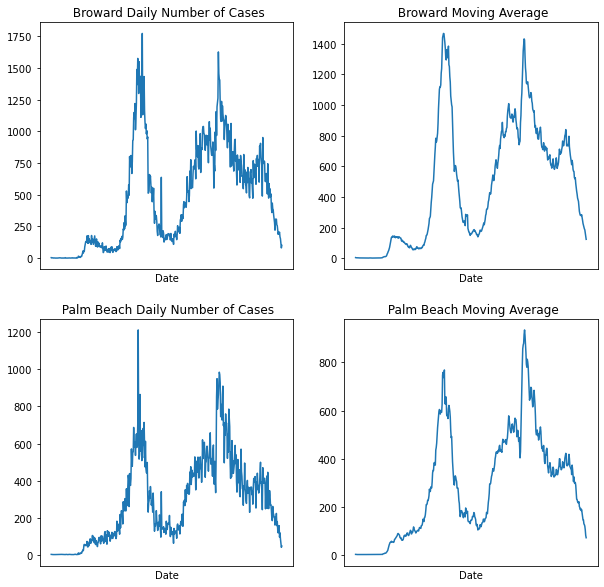

In [36]:
#plotting daily cases and moving average for Broward and Palm Beach
fig, h_axes = plt.subplots(2,2,figsize=[10,10])

plt.sca(h_axes[0,0])
plt.plot(broward['Date'], broward['Daily Cases'])

h_axes[0,0].set_title(' Broward Daily Number of Cases')
h_axes[0,0].set_xlabel('Date')
h_axes[0,0].set_xticks([])


plt.sca(h_axes[0,1])
plt.plot(broward['Date'], broward['Moving Average'])

h_axes[0,1].set_title(' Broward Moving Average')
h_axes[0,1].set_xlabel('Date')
h_axes[0,1].set_xticks([])


plt.sca(h_axes[1,0])
plt.plot(palmbeach['Date'], palmbeach['Daily Cases'])

h_axes[1,0].set_title(' Palm Beach Daily Number of Cases')
h_axes[1,0].set_xlabel('Date')
h_axes[1,0].set_xticks([])


plt.sca(h_axes[1,1])
plt.plot(palmbeach['Date'], palmbeach['Moving Average'])

h_axes[1,1].set_title(' Palm Beach Moving Average')
h_axes[1,1].set_xlabel('Date')
h_axes[1,1].set_xticks([])
